# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../input/montcoalert/911.csv")

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [6]:
# top 5 zipcodes with 911 calls
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [7]:
# top 5 townships(twp) for 911 calls
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [8]:
# no. of unique titles
len(df['title'].unique())

148

In [11]:
# create a reason column using apply method
#create your logic first of what you want to achieve
x = df['title'].iloc[0]
x.split(':')

['EMS', ' BACK PAINS/INJURY']

In [12]:
# now converge your logic
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [13]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [14]:
# most common reason for 911 calls
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

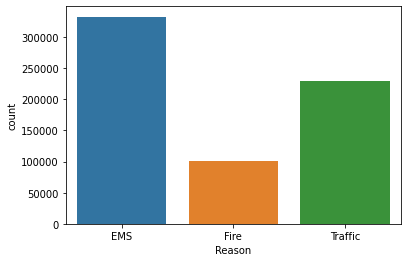

In [15]:
# use Seaborn (DVL) to create a plot for 911 calls based on reason
sns.countplot(x= 'Reason', data = df)

In [16]:
# what is the data type of the object in timestamp columns
type(df['timeStamp'].iloc[0])

str

In [17]:
# convert timestamp data type from strings to date time object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [18]:
# check the conversion
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:10:52')

In [25]:
time.hour

17

In [27]:
# get the hour for each 911 call
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [28]:
df['Hour']

0         17
1         17
2         14
3         16
4         16
          ..
663517    15
663518    15
663519    15
663520    15
663521    15
Name: Hour, Length: 663522, dtype: int64

In [29]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day Of Week'] = df['timeStamp'].apply(lambda time: time.day_of_week)

In [30]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


In [31]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [32]:
df['Day Of Week'] = df['Day Of Week'].map(dmap)

In [33]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


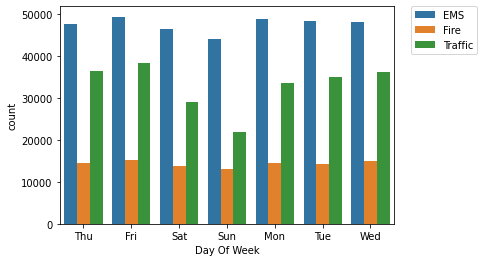

In [36]:
# create a plot for reason based on Day of week column

sns.countplot(x= 'Day Of Week', data = df, hue='Reason')

# to relocate the legend
plt.legend(bbox_to_anchor= (1.05,1), loc=2, borderaxespad= 0.)

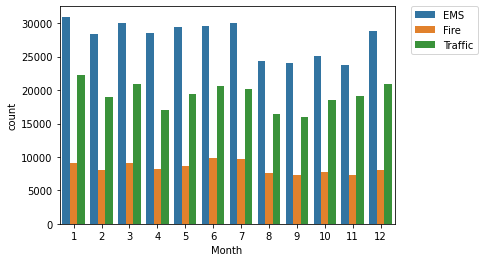

In [37]:
# create a plot for reason based on month
sns.countplot(x= 'Month', data = df, hue='Reason')

# to relocate the legend
plt.legend(bbox_to_anchor= (1.05,1), loc=2, borderaxespad= 0.)